# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [41]:
import pandas as pd
petrol = pd.read_csv('petrol.csv');
print(petrol.shape)
petrol.describe().transpose()

(48, 5)


,count,mean,std,min,25%,50%,75%,max
tax,48.0,7.668333,0.950770,5.000,7.00000,7.5000,8.12500,10.000
income,48.0,4241.833333,573.623768,3063.000,3739.00000,4298.0000,4578.75000,5342.000
highway,48.0,5565.416667,3491.507166,431.000,3110.25000,4735.5000,7156.00000,17782.000
dl,48.0,0.570333,0.055470,0.451,0.52975,0.5645,0.59525,0.724
consumption,48.0,576.770833,111.885816,344.000,509.50000,568.5000,632.75000,968.000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [42]:
taxIqr = petrol.iloc[:,0].quantile(.75) - petrol.iloc[:,0].quantile(.25)
incIqr = petrol.iloc[:,1].quantile(.75) - petrol.iloc[:,1].quantile(.25)
highIqr = petrol.iloc[:,2].quantile(.75) - petrol.iloc[:,2].quantile(.25) 
dlIqr = petrol.iloc[:,3].quantile(.75) - petrol.iloc[:,3].quantile(.25)
consumptionIqr = petrol.iloc[:,4].quantile(.75) - petrol.iloc[:,4].quantile(.25)


taxMinCap = petrol.iloc[:,0].quantile(.25) - (1.5 * taxIqr)
incMinCap = petrol.iloc[:,1].quantile(.25) - (1.5 * incIqr)
highMinCap = petrol.iloc[:,2].quantile(.25) - (1.5 * highIqr)
dlMinCap = petrol.iloc[:,3].quantile(.25) - (1.5 * dlIqr)
consumptionMinCap = petrol.iloc[:,4].quantile(.25) - (1.5 * consumptionIqr)

taxMaxCap = petrol.iloc[:,0].quantile(.75) + (1.5 * taxIqr)
incMaxCap = petrol.iloc[:,1].quantile(.75) + (1.5 * incIqr)
highMaxCap = petrol.iloc[:,2].quantile(.75) + (1.5 * highIqr)
dlMaxCap = petrol.iloc[:,3].quantile(.75) + (1.5 * dlIqr)
consumptionMaxCap = petrol.iloc[:,4].quantile(.75) + (1.5 * consumptionIqr)

petrol = petrol[(petrol.iloc[:,0] >= taxMinCap) & (petrol.iloc[:,0] <= taxMaxCap)]
petrol = petrol[(petrol.iloc[:,1] >= incMinCap) & (petrol.iloc[:,1] <= incMaxCap)]
petrol = petrol[(petrol.iloc[:,2] >= highMinCap) & (petrol.iloc[:,2] <= highMaxCap)]
petrol = petrol[(petrol.iloc[:,3] >= dlMinCap) & (petrol.iloc[:,3] <= dlMaxCap)]
petrol = petrol[(petrol.iloc[:,4] >= consumptionMinCap) & (petrol.iloc[:,4] <= consumptionMaxCap)]
print(petrol.shape)
petrol.describe().transpose()


(43, 5)


,count,mean,std,min,25%,50%,75%,max
tax,43.0,7.711163,0.829932,6.000,7.0000,7.500,8.2500,9.000
income,43.0,4186.837209,557.816403,3063.000,3719.5000,4258.000,4494.0000,5319.000
highway,43.0,5209.744186,2773.890659,431.000,2946.5000,4725.000,6917.5000,11868.000
dl,43.0,0.565535,0.050616,0.451,0.5295,0.563,0.5895,0.677
consumption,43.0,564.744186,86.805775,344.000,517.0000,566.000,629.5000,782.000


# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

Observing the below correlation charts between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way.
Insights : As tax increases the consumption decreases. As number of drivers is more consumption is more

In [43]:
#importing seaborn for statistical plots
import seaborn as sns

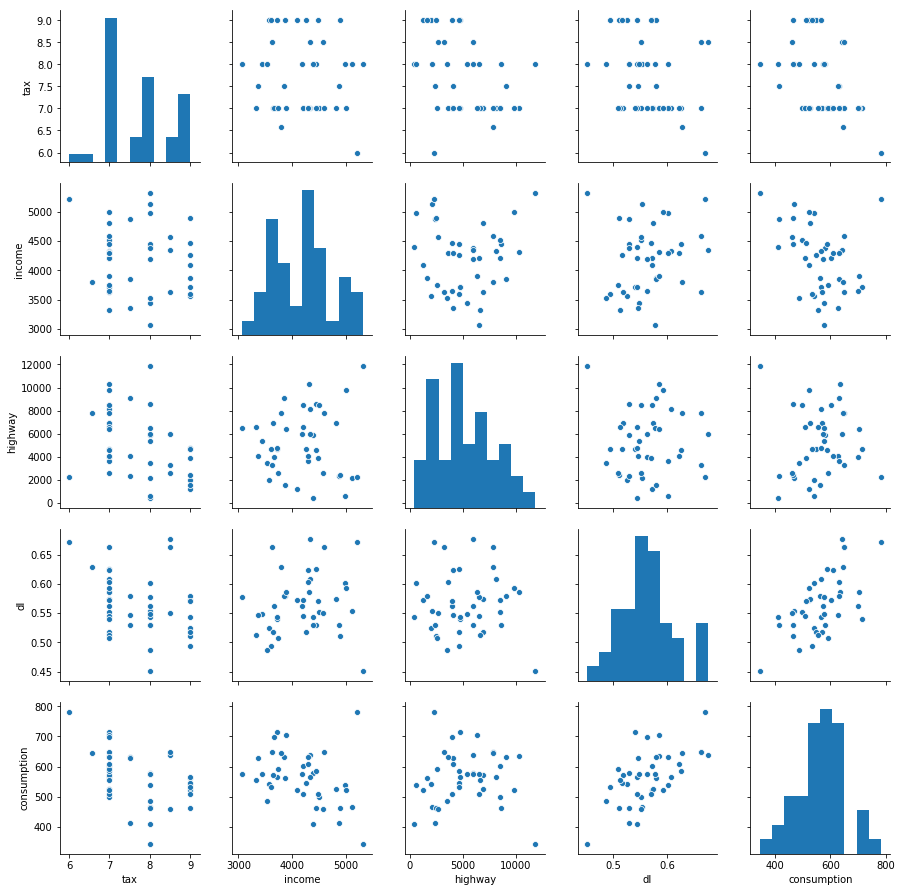

In [44]:
petrol_attr = petrol.iloc[:,0:5]
sns.pairplot(petrol_attr)


Observing the above correlation charts between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset
Divide the data into feature(X) and target(Y) sets."

Since only number of drivers and tax are strongly correlated, we consider only these two variables at present.

In [45]:
x = petrol.drop('consumption', axis=1)
x = x.drop('highway', axis=1)
x = x.drop('income', axis=1)
y = petrol.consumption 

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
print("Shape of the X training set : {0} and X testing set {1}".format(X_train.shape, X_test.shape))

Shape of the X training set : (34, 2) and X testing set (9, 2)


# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [47]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {0} is {1}".format(col_name, regression_model.coef_[idx]))
    

The coefficient for tax is -30.70924254754727
The coefficient for dl is 892.8862087487333


# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [48]:

regression_model.score(X_test, y_test)

0.2876056314158515

# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [49]:
x = petrol.drop('consumption', axis=1)
y = petrol.consumption 

X_train, X_test, Y_train, Y_test =  train_test_split(x, y, test_size=.20, random_state=1)
print(X_train.shape, ', ', X_test.shape)
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

(34, 4) ,  (9, 4)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:

regression_model.score(X_train, Y_train)

0.6407622941321002

# Question 9: Print the coefficients of the multilinear regression model

In [51]:


for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {0} is {1}".format(col_name, regression_model.coef_[idx]))

The coefficient for tax is -39.411583621415424
The coefficient for income is -0.06262814005687901
The coefficient for highway is -0.0030219870395790096
The coefficient for dl is 950.8827441430783


# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

After including the income and highway in the X variable, we see increase in R Square from 0.28 to 0.64, 
which is good, but this is due to existence of lighter correlation from income and highway to Consumption. I think 
this is also due to presence of low collieanrity between the X variables. 